<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Voice_Recogintion_LR_and_DST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/Duku-code/Duku/main/voice-classification.csv'
df= pd.read_csv(url)

In [27]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
df.shape

(3168, 21)

In [30]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [32]:
df['label'].unique()

array(['male', 'female'], dtype=object)

In [33]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['label'])

LabelEncoder()

In [35]:
le.classes_

array(['female', 'male'], dtype=object)

In [36]:
le.transform(df['label'])

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
df['target'] = le.transform(df['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,target
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1


In [45]:
df.drop(['label'], axis=1, inplace = True)

<ipython-input-39-1a4dd72ba6dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, fmt="0.1f", cmap='crest')


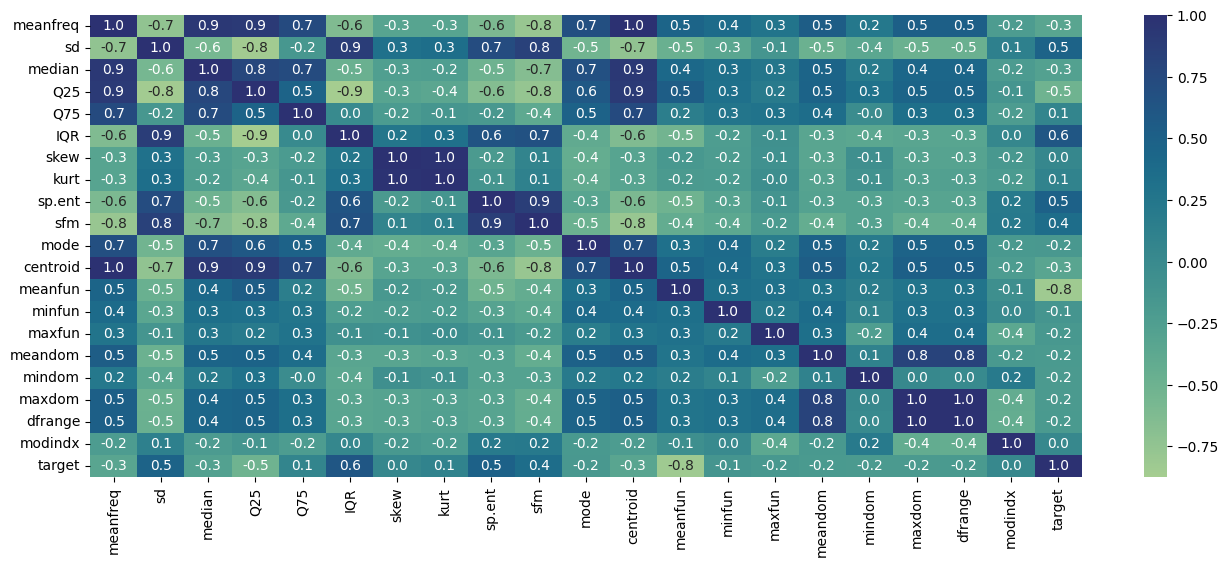

In [39]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot= True, fmt="0.1f", cmap='crest')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  target    3168 non-null   int6

In [51]:
X=df.drop(['target'], axis=1)
y=df['target']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LogReg = LogisticRegression()


In [56]:
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
LogReg.coef_

array([[-7.37872799e-01,  1.35640616e+00, -9.74700370e-01,
        -5.09155959e+00,  2.25917333e+00,  7.35073292e+00,
        -4.23536585e-01,  1.20981984e-02,  3.78702145e+00,
        -7.32557722e-01, -2.03743284e-01, -7.37872799e-01,
        -1.23586039e+01, -5.78502717e-02, -2.18082759e+00,
        -4.17039624e-01, -9.63351423e-01, -4.84626087e-01,
         4.78725336e-01, -1.08102350e+00]])

In [58]:
LogReg.intercept_

array([0.75353159])

In [59]:
y_pred = LogReg.predict(X_test)

In [60]:
y_pred[:5]

array([0, 1, 1, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.907465825446898

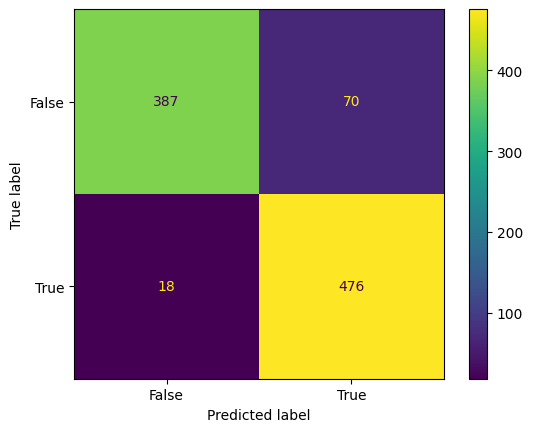

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display  = ConfusionMatrixDisplay(cm,  display_labels=['False','True' ])
cm_display.plot()
plt.show()

In [64]:
from sklearn.metrics import precision_score,f1_score,recall_score
precision_score(y_test,y_pred)

0.8717948717948718

In [65]:
recall_score(y_test,y_pred)

0.9635627530364372

In [66]:
f1_score(y_test, y_pred)

0.9153846153846155

In [67]:
from sklearn.metrics import roc_auc_score

In [70]:
y_pred_prob = LogReg.predict_proba(X_test)
roc_auc_score(y_test,y_pred_prob[:,1])

0.9221511530045446

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier(criterion ='gini', random_state=0)

In [74]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

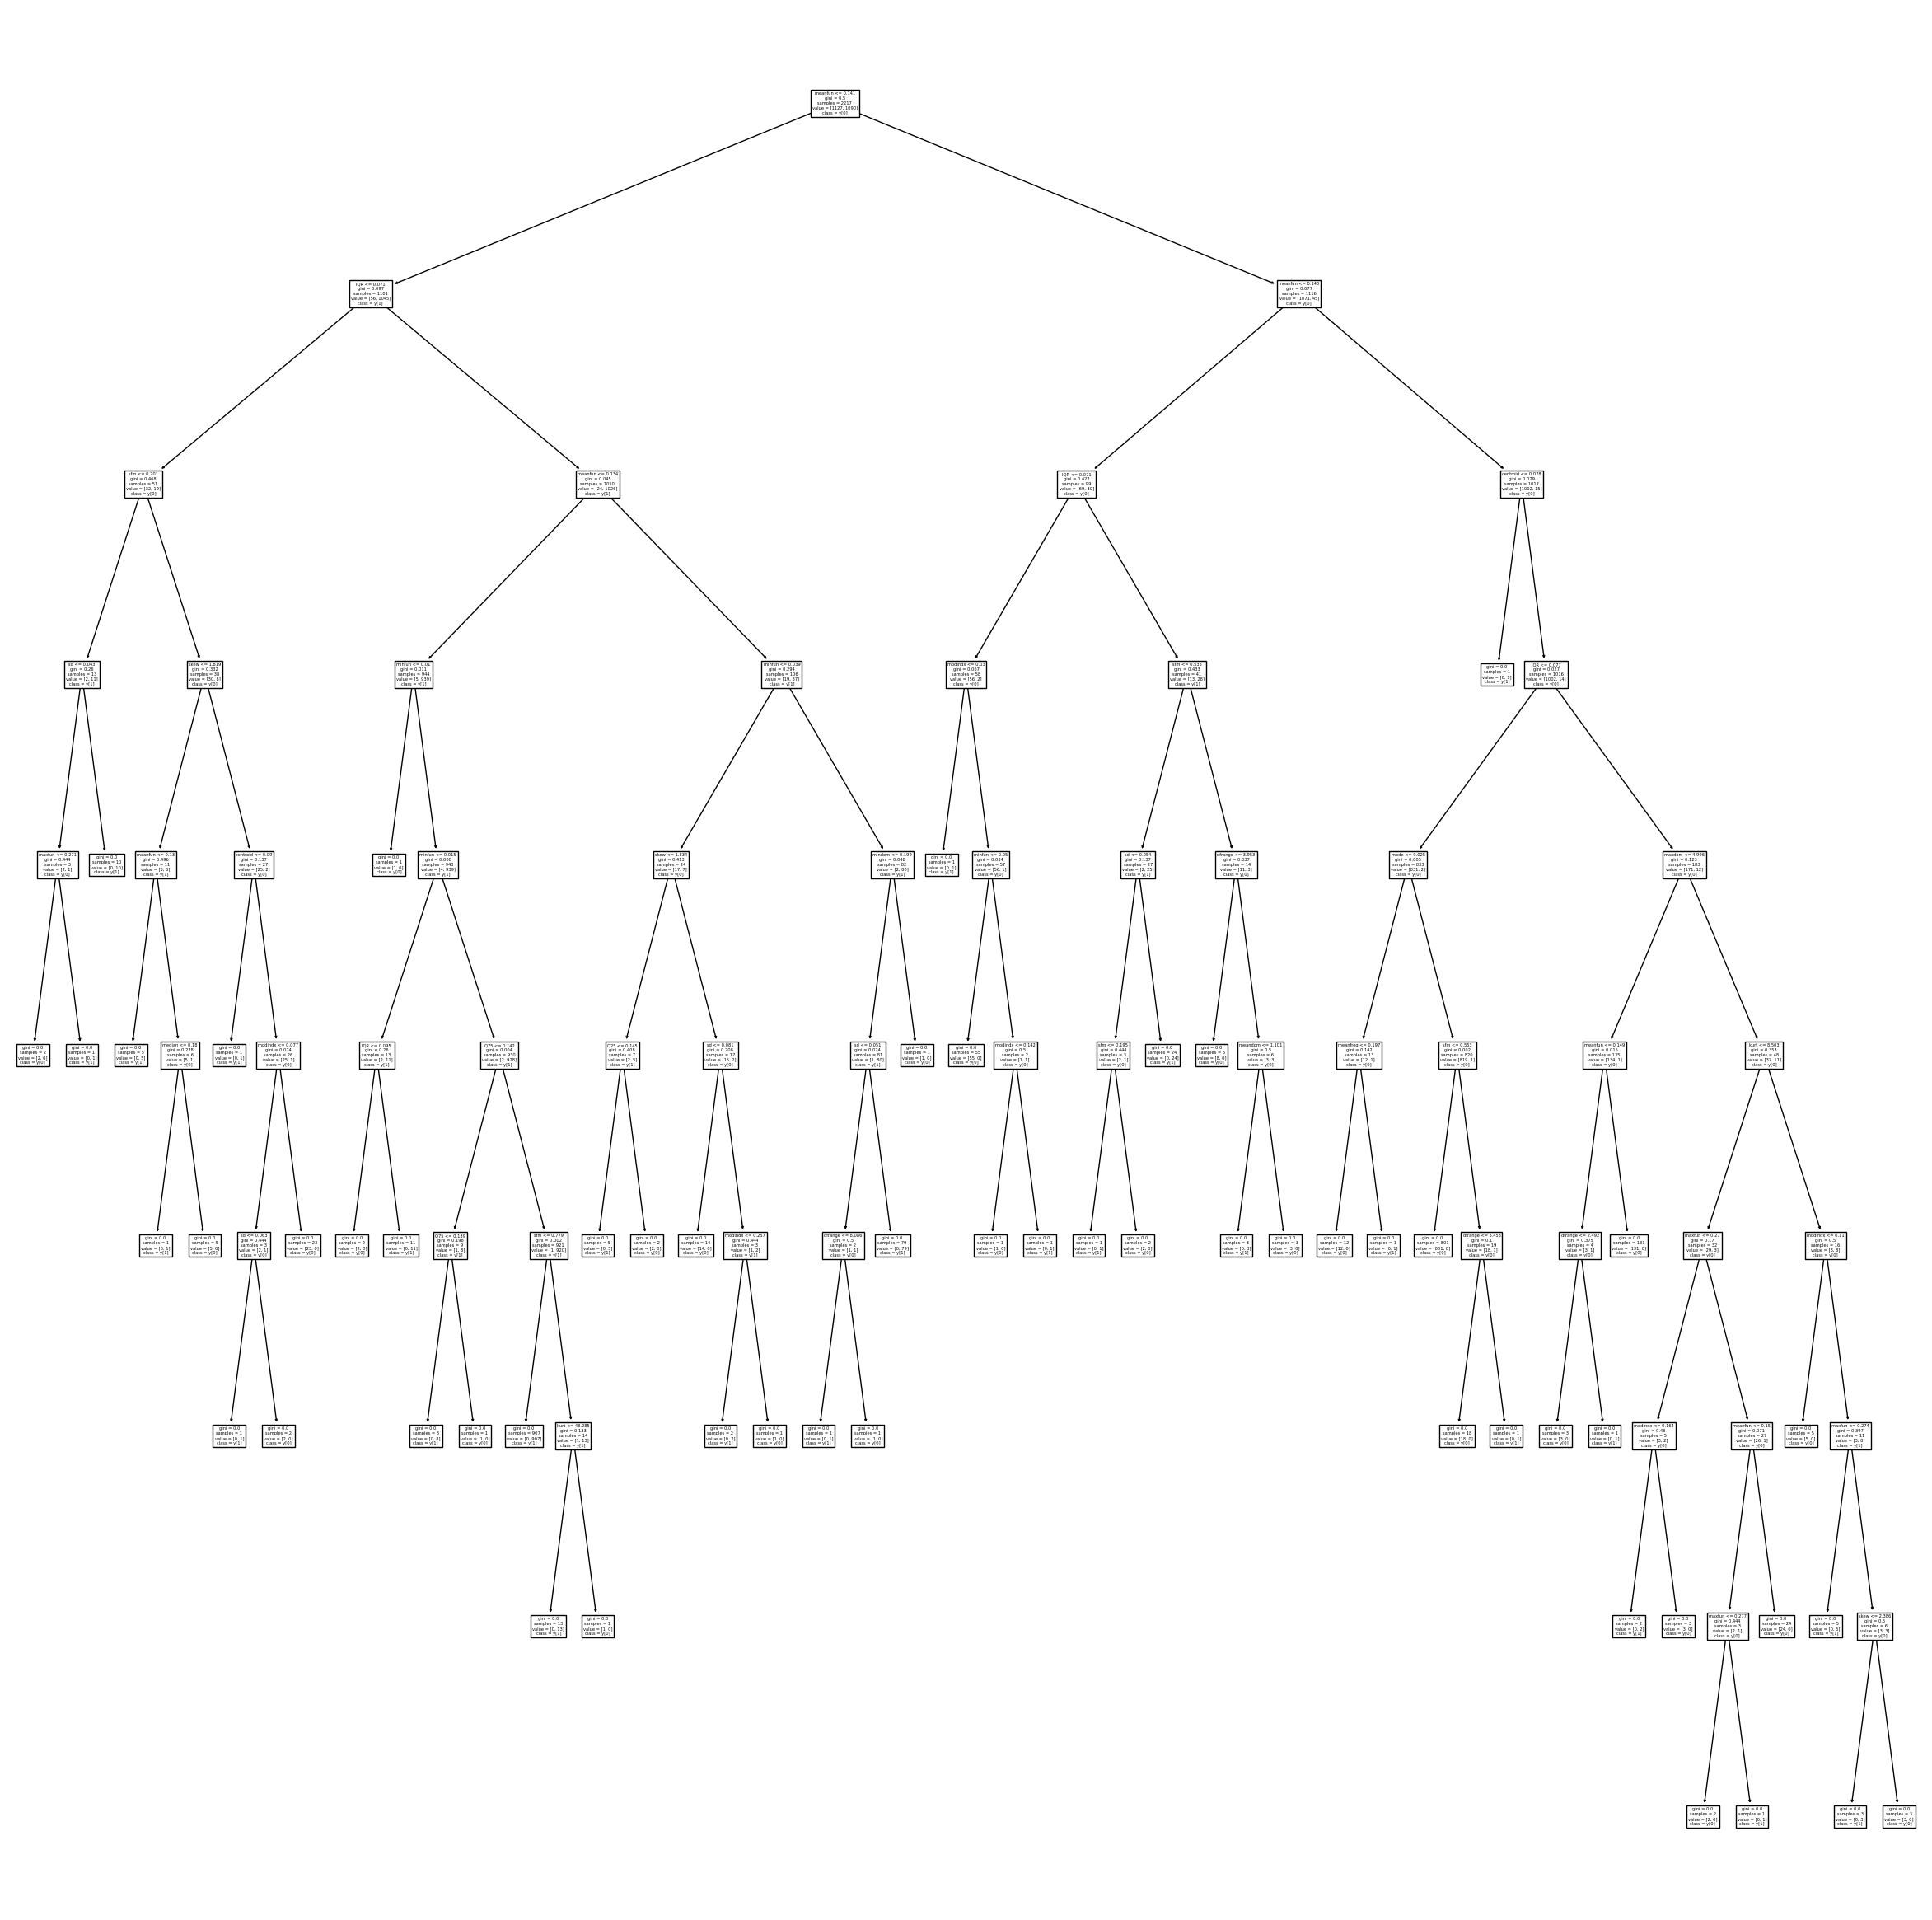

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(dt, feature_names=X_train.columns,class_names=True)
plt.show()

In [79]:
dt.get_depth()

9

In [80]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [81]:
f1_score(y_train,y_train_pred)

1.0

In [82]:
f1_score(y_test,y_test_pred)

0.973630831643002

In [83]:
print("F1 score on training data is",f1_score(y_train,y_train_pred))
print("F1 score on test data is",f1_score(y_test,y_test_pred))

F1 score on training data is 1.0
F1 score on test data is 0.973630831643002
